# Ginzburg–Landau Free Energy
Denote by Ginzburg–Landau free energy as $E[u]$, for $x\in \mathbb{R}^1$

$$
E[u] = \int^L_0 \dfrac{\epsilon^2}{2} \left\vert \frac{\partial u}{\partial x} \right\vert^2 + W(u) dx
$$

where $W(u)=\dfrac{(1-u^2)^2}{4}$ is double-well potential.

Use the convex splitting method, the energy can be splitted into contractive part $E_c[u]$ and expansive part $E_e[u]$

$$
E[u] = E_c[u] - E_e[u] = \int^L_0 \dfrac{\epsilon^2}{2} \left\vert \frac{\partial u}{\partial x} \right\vert^2 + W_c(u) dx - \int^L_0 W_e dx
$$

where $W_c(u)=\dfrac{u^4+1}{4}$ and $W_e(u)=\dfrac{u^2}{2}$, both $E_c[u]$ and $E_e[u]$ are convex.

$E_c[u]$ is computed implicitly and $E_e[u]$ is computed explicitly.


# Allen-Cahn Equation

Consider the increment of $E[u]$ denoted by $\Delta E[u]=E[u+h\xi]-E[u]$ for $\xi$ vanishing at boundary of domain.

$$
\begin{align}
    \Delta E[u]
    & = E[u+h\xi] - E[u] \\
    & = \int^L_0 \dfrac{\epsilon^2}{2} \left(\left\vert \frac{\partial u}{\partial x} + h\frac{\partial \xi}{\partial x}\right\vert^2 - \left\vert \frac{\partial u}{\partial x} \right\vert^2\right) + (W(u+h\xi)-W(u)) dx \\
    & = \int^L_0 \epsilon^2 h\frac{\partial u}{\partial x}\frac{\partial \xi}{\partial x} + \dfrac{\epsilon^2}{2} \left\vert h^2\frac{\partial \xi}{\partial x}\right\vert^2 + (W(u+h\xi)-W(u)) dx \\
\end{align}
$$

Expansion $W(u+h)$ by Taylor Theroem,

$$
\begin{align}
    \Delta E[u]
    & = \int^L_0 \epsilon^2 h\frac{\partial u}{\partial x}\frac{\partial \xi}{\partial x} + \dfrac{\epsilon^2h^2}{2} \left\vert\frac{\partial \xi}{\partial x}\right\vert^2 + h\xi W'(u) dx \\
\end{align}
$$

# Linear splitting

\begin{equation}
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import gamma, binom
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import fractional_matrix_power
from tqdm import tqdm
from scipy.optimize import fsolve


def compute_classical_energy(u, epsilon, dx):
    ux = np.gradient(u)/dx
    term1 = np.sum((epsilon**2 / 2.0) * (ux**2))
    term2 = np.sum(((1 - u ** 2) ** 2) / 4)
    return dx * (term1 + term2)

def variationalEnergy(history_arr = None, classicalEnergy = None, current = None, alpha = None, t_step = None):
    if alpha != 1:
        for j in range(1,current):
            h_d = history_arr[:,j]-history_arr[:,j-1]
            q = q_array(terminate = j, a = alpha, dt = t_step)
            for k in range(0,j):

                classicalEnergy -= 1/2*h_step**2*q[k]*np.sum((h_d-(history_arr[:,j-k]-history_arr[:,j-k-1]))**2/(t_step**2))
        return classicalEnergy
    else:
        return classicalEnergy


def set_CaputoL1_coefficient(terminate_point, alpha):
    # index start j=1
    coeffi = [(j)**(1-alpha) - (j-1)**(1-alpha) for j in range(1, terminate_point+1)]
    return np.array(coeffi)

def set_GL_coefficient(terminate_point, dt, alpha):
    coeffi = [(-1)**(j) * binom(alpha, j) for j in range(0, terminate_point+1)]
    return np.array(coeffi)/dt**alpha

def set_Laplacian1D(nx, dx):
    # central differece
    diagonals = [np.ones(nx-1), -2*np.ones(nx-1), np.ones(nx-1)]
    offsets = [-1, 0, 1]
    L = diags(diagonals, offsets, shape=(nx-1, nx-1), format='csr')
    L[0,-1] = L[-1,0] = 1
    return L / dx**2

def set_backward1D(nx):
    diagonals = [np.ones(nx-1), -np.ones(nx-1)]
    offsets = [0, -1]
    B = diags(diagonals, offsets, shape=(nx-1, nx-1), format='csr')
    return B


C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


alpha: 0.1
iter: 1
put in the equation 3.0282846668030173e-15
iter: 101
put in the equation 3.741962194848174e-15
iter: 201
put in the equation 3.524848827571324e-15
iter: 301
put in the equation 4.328446199157271e-15
iter: 401
put in the equation 3.524848827571324e-15
iter: 501
put in the equation 3.552713678800501e-15
iter: 601
put in the equation 3.3232593448441795e-15
iter: 701
put in the equation 4.328446199157271e-15
iter: 801
put in the equation 4.165926057296536e-15
iter: 901
put in the equation 3.8968670012594065e-15
alpha: 0.3
iter: 1
put in the equation 4.694550195664332e-15
iter: 101
put in the equation 5.9580819677934555e-15
iter: 201
put in the equation 5.756054031998179e-15
iter: 301
put in the equation 5.475099487534308e-15
iter: 401
put in the equation 6.2803698347351005e-15
iter: 501
put in the equation 5.102196573270515e-15
iter: 601
put in the equation 5.891509130072236e-15
iter: 701
put in the equation 6.217248937900877e-15
iter: 801
put in the equation 6.822227891

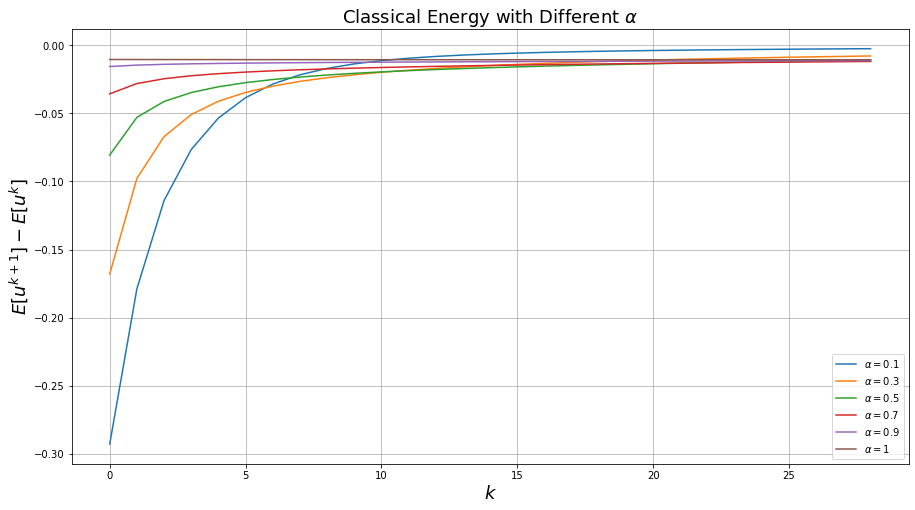

In [57]:
# L1 method
# define the fractional order
# alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9]
alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
# alpha_list = [1]
# alpha = 0.5
# 定義常數
eps = 0.1

# 定義計算域大小及網格數量
L = 10
Nx = 2**6
x = np.linspace(-L/2, L/2, Nx)
x = x[:-1]
# u = np.cos(x)
# u = np.cos(x)
# u = np.cos(2*np.pi*x)/1.5 + np.random.uniform(-0.1,0.1,Nx-1)
u = 1/4 * np.cos(2*x) + 1/2
# u = -(np.cos(2*np.pi*x)/4 +0.2)
# u = 2*np.random.rand(Nx-1)-1
# u = np.ones(Nx-1)
# u[7:15] = u[20:35] = 0
# u0 = u + np.random.rand(Nx-1)
u0= u
m0 = np.sum(u)

# 計算網格間距
dx = L / (Nx - 1)
dt = 1e-2
iter_max = 1000

Lap = set_Laplacian1D(Nx, dx)
I = diags(np.ones(Nx-1), shape=(Nx-1, Nx-1))

energy = compute_classical_energy(u, eps, dx)
energy_list = [energy]

u_historyArray = u0
# mass_list = [m0]


data_dict = {
}

fig = plt.figure(figsize=(15,8))

for alpha in alpha_list:
    energy_list = [compute_classical_energy(u0, eps, dx)]
    u_historyArray = u0
    u = u0
    print(f"alpha: {alpha}")
    if alpha == 1:
        # solved by classical allen cahn
        H = (2+1/dt) * I - eps**2 * Lap
        
        for i in range(iter_max):
            b = (3+1/dt)*u - u**3
            u_perv = np.copy(u)
            u = spsolve(H, b)
            energy = compute_classical_energy(u, eps, dx)
            energy_list.append(energy)
            if i % 100 == 0:
                print(f"iter: {i+1}")
            
#                 test_put_in = (u-u_perv)/dt - eps**2 *Lap*u - u + u**3
                test_put_in = H * u - b
                print("put in the equation", np.linalg.norm(test_put_in, 2))
            u_historyArray = np.vstack([u_historyArray, u])
        
    else:
        CaputoL1_coefficient = set_CaputoL1_coefficient(iter_max, alpha)/ dt**alpha / gamma(2-alpha)
        H = (CaputoL1_coefficient[0]+2) * I - eps**2 * Lap
        
        for i in range(iter_max):
            if i == 0: # first iteration u_1
                b =  (3 + CaputoL1_coefficient[0])*u - u**3
                u = spsolve(H, b)
            else:
                u_nonlocalDiff = np.flipud(np.diff(u_historyArray, axis=0))
                u_nonlocal = CaputoL1_coefficient[1:i+1].dot(u_nonlocalDiff)
        
                b = (3 + CaputoL1_coefficient[0])*u - u**3 - u_nonlocal
                u = spsolve(H, b)
            
            energy = compute_classical_energy(u, eps, dx)
            energy_list.append(energy)
    
            u_historyArray = np.vstack([u_historyArray, u])
            if i % 100 == 0:
        
                print(f"iter: {i+1}")
                u_nonlocalDiff = np.flipud(np.diff(u_historyArray, axis=0))
                CaputoU = CaputoL1_coefficient[0:i+1].dot(u_nonlocalDiff)
#                 test_put_in = CaputoU - eps**2*Lap*u - u + u**3
                test_put_in = H*u - b
                print("put in the equation", np.linalg.norm(test_put_in, 2))
            
    

    data_dict[alpha] = u_historyArray
    
#     plt.plot(energy_list)
    plt.plot(np.diff(energy_list[:30]))
    
plt.legend([r"$\alpha=$"+f"{alpha}" for alpha in alpha_list])
plt.title(r"Classical Energy with Different $\alpha$", fontsize=18)
plt.xlabel(r"$k$", fontsize=18)
plt.ylabel(r"$E[U_{k}]$", fontsize=18)
plt.ylabel(r"$E[u^{k+1}]-E[u^{k}]$", fontsize=18)
plt.grid()
plt.show()

In [32]:
np.matmul(Lap.toarray(), u)

array([ 1.61856661e-09,  2.19120722e-09,  2.14741647e-09,  1.07621645e-09,
       -3.87316845e-10, -1.35570133e-09, -1.57285740e-09, -1.40950362e-09,
       -1.26571820e-09, -1.23600330e-09, -1.29777789e-09, -1.57686486e-09,
       -2.26600605e-09, -3.29505667e-09, -4.14591739e-09, -4.01571754e-09,
       -2.26502550e-09,  1.01852038e-09,  4.75409934e-09,  7.38265271e-09,
        7.88455168e-09,  6.33423269e-09,  3.60633123e-09,  7.69034614e-10,
       -1.38156508e-09, -2.53290011e-09, -2.79824519e-09, -2.51020538e-09,
       -2.00579109e-09, -1.50228630e-09, -1.09692166e-09, -8.59259330e-10,
       -8.76553941e-10, -1.18504317e-09, -1.65307767e-09, -2.01124806e-09,
       -2.02166461e-09, -1.56778412e-09, -6.10398843e-10,  7.60422836e-10,
        2.16849116e-09,  3.11236192e-09,  3.45312401e-09,  3.46652484e-09,
        3.27374039e-09,  2.61420041e-09,  1.32632749e-09, -2.97859515e-10,
       -1.75343473e-09, -2.67533551e-09, -2.94956237e-09, -2.72001444e-09,
       -2.35210962e-09, -

In [38]:
u == np.ones(63)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

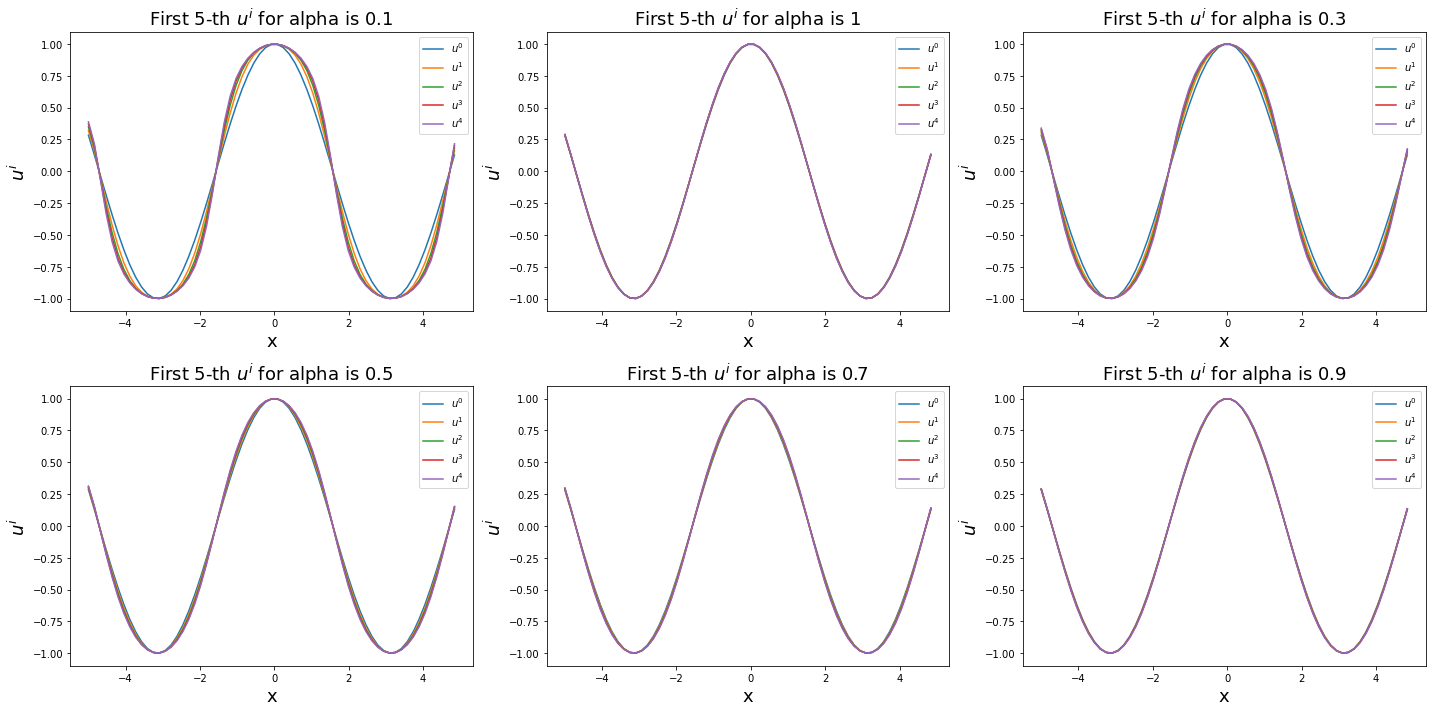

In [40]:
index = 5

gs = gridspec.GridSpec(2, 3)
gs_pos_list = [(0,0), (0,2), (1,0), (1,1), (1,2), (0,1)]
title_list = [f"First {index}-th $u^i$ for alpha is {alpha}" for alpha in alpha_list]

fig = plt.figure(figsize=(20,10))
ax_list = [plt.subplot(gs[gs_pos]) for gs_pos in gs_pos_list]
i = 0

for alpha, u_historyArray in data_dict.items():
    for j in range(index):
        ax_list[i].plot(x, u_historyArray[j])
    
    ax_list[i].set_title(f"First {index}-th $u^i$ for alpha is {alpha}", fontsize=18)
    ax_list[i].legend([f"$u^{i}$" for i in range(index)])
    ax_list[i].set_xlabel(r"x", fontsize=18)
    ax_list[i].set_ylabel(r"$u^i$", fontsize=18)
    i = i+1

fig.tight_layout()
plt.show()

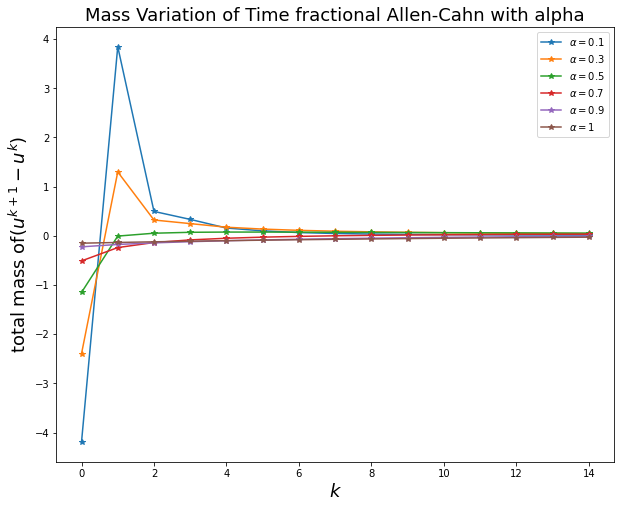

In [13]:
plt.figure(figsize=(10,8))
for alpha, u_historyArray in data_dict.items():
    
    massDiff_list = [np.sum(a) for a in np.diff(u_historyArray, axis=0)]
    plt.plot(massDiff_list[:15], "-*")


plt.title(f"Mass Variation of Time fractional Allen-Cahn with alpha", fontsize=18)
plt.legend([r"$\alpha=0.1$", r"$\alpha=0.3$", r"$\alpha=0.5$", r"$\alpha=0.7$", r"$\alpha=0.9$", r"$\alpha=1$"])
plt.xlabel(r"$k$", fontsize=18)
plt.ylabel(r"total mass of$ (u^{k+1}-u^{k})$", fontsize=18)
#     plt.ylim(-0.01,)
plt.show()
# 定義mass 的符號 在下標
# plt.title(r"Mass Variation of Time fractional Allen-Cahn with different $\alpha$", fontsize=18)
# plt.xlabel(r"$k$-time", fontsize=18)
# plt.ylabel(r"totla mass of$ (u^{k+1}-u^{k})$", fontsize=18)
# plt.show()

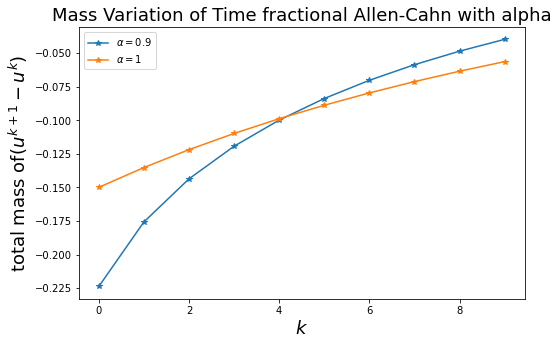

In [15]:
plt.figure(figsize=(8,5))
for alpha, u_historyArray in data_dict.items():
    if alpha == 0.9 or alpha == 1:
        massDiff_list = [np.sum(a) for a in np.diff(u_historyArray, axis=0)]
        plt.plot(massDiff_list[:10], "-*")


plt.title(f"Mass Variation of Time fractional Allen-Cahn with alpha", fontsize=18)
plt.legend([r"$\alpha=0.9$", r"$\alpha=1$"])
plt.xlabel(r"$k$", fontsize=18)
plt.ylabel(r"total mass of$ (u^{k+1}-u^{k})$", fontsize=18)
#     plt.ylim(-0.01,)
plt.show()

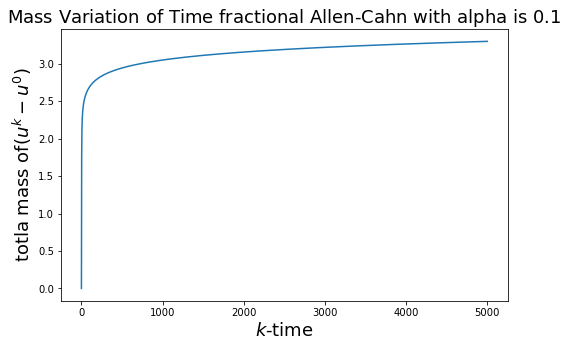

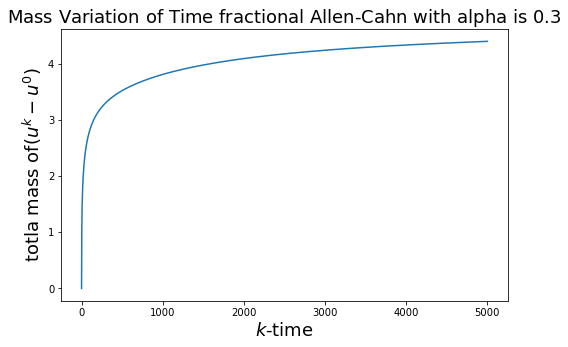

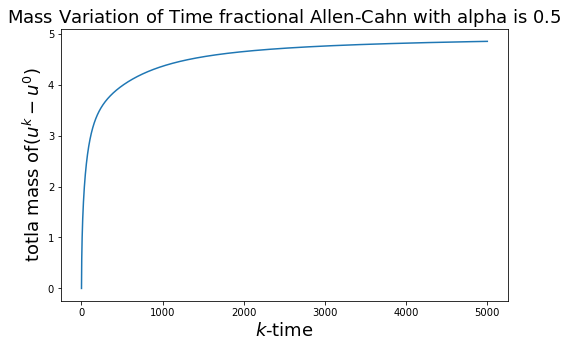

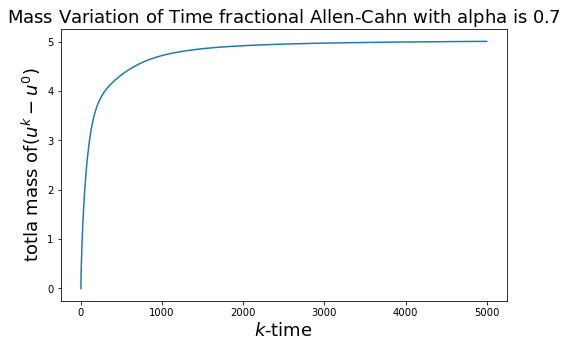

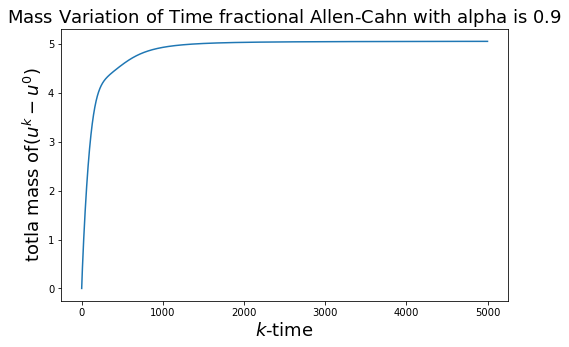

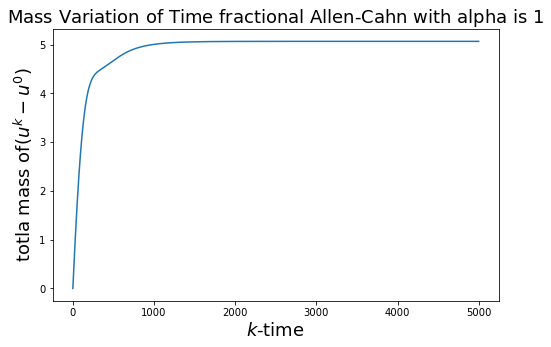

In [22]:
for alpha, u_historyArray in data_dict.items():
    plt.figure(figsize=(8,5))
    m0 = np.sum(u_historyArray[0])
    massDiff_list = [m0-np.sum(u) for u in u_historyArray]
    plt.plot(massDiff_list)
    plt.plot()
    plt.title(f"Mass Variation of Time fractional Allen-Cahn with alpha is ${alpha}$", fontsize=18)
    plt.xlabel(r"$k$-time", fontsize=18)
    plt.ylabel(r"totla mass of$ (u^{k}-u^{0})$", fontsize=18)
#     plt.ylim(-0.01,)
    plt.show()

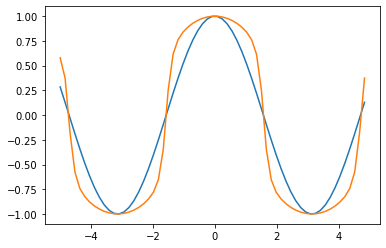

In [13]:
plt.plot(x,data_dict[0.1][0])
plt.plot(x,data_dict[0.1][-1])

In [3]:
massDiff_list = [np.sum(a) for a in np.diff(data_dict[0.5], axis=0)]

In [51]:
np.sum(data_dict[0.5][2]-data_dict[0.5][1])

-0.1728580633974712

In [34]:
g* np.sum(data_dict[0.5][0]-data_dict[0.5][0]**3)

-0.09776737491784936

In [50]:
g = dt**0.5 * gamma(1.5) / (2*dt**0.5 * gamma(1.5) + set_CaputoL1_coefficient(100, 0.5)[0])
a = data_dict[0.5][1]-data_dict[0.5][1]**3
b = (set_CaputoL1_coefficient(100, 0.5)[1]/(dt**0.5*gamma(1.5)))*(data_dict[0.5][1]-data_dict[0.5][0])
np.sum(g*(a-b))

-0.17285806339747195

In [4]:
import json

data_info = {
    "fractoinal order" : alpha,
    "width" : eps,
    "spatial domain" : [-L/2, L/2],
    "number of points in time": dt,
    "number of points in space": Nx,
    "inital value": u0.tolist(),
    "boundary condition": "periodic",
}

with open(f"data/fractional_allenCahn1D_L1_{alpha}.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable 
    # if the data is nested
    json.dump(data_info, f)

In [5]:
from pathlib import Path

data_list = []

path_root = Path(r'data/')
for _ in path_root.iterdir():
    if ".json" in _.name:
        print(_)
        data = json.load(_.open())
        data_list.append(data)

data\fractional_allenCahn1D_0.1.json
data\fractional_allenCahn1D_0.5.json
data\fractional_allenCahn1D_0.9.json
data\fractional_allenCahn1D_L1_0.5.json


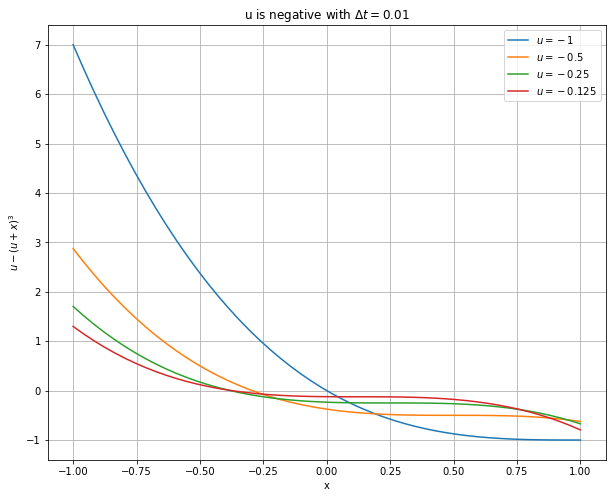

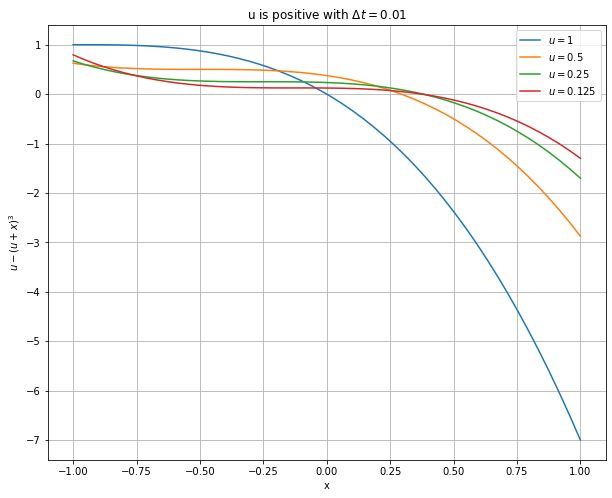

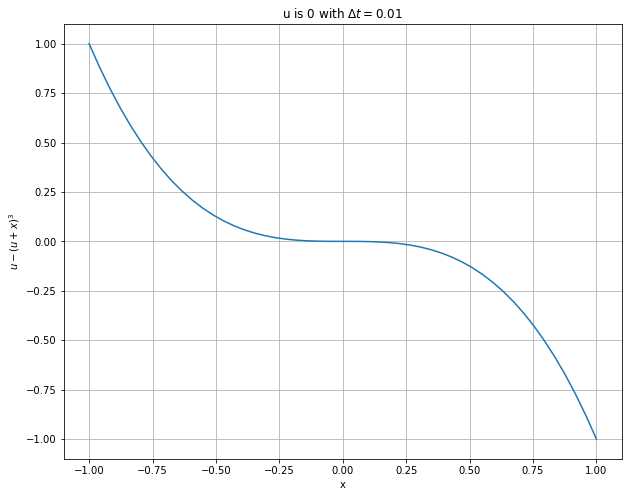

In [66]:
negative_p_list = [-2**-i for i in range(4)]
positive_p_list = [2**-i for i in range(4)]
negative_p_label = [f"$u={p}$" for p in negative_p_list]
positive_p_label = [f"$u={p}$" for p in positive_p_list]
x = np.linspace(-1,1)

plt.figure(figsize=(10,8))
for p in negative_p_list:
    y = (p - (p+x)**3)
    plt.plot(x,y)
    
plt.title(f"u is negative with $\Delta t={dt}$")
# plt.ylim(-1.1,1.1)
plt.ylabel(r"$u-(u+x)^3$")
plt.xlabel("x")
plt.legend(negative_p_label)
plt.grid()

plt.figure(figsize=(10,8))
for p in positive_p_list:
    y = (p - (p+x)**3)
    plt.plot(x,y)

plt.title(f"u is positive with $\Delta t={dt}$")
# plt.ylim(-1.1,1.1)
plt.ylabel(r"$u-(u+x)^3$")
plt.xlabel("x")
plt.legend(positive_p_label)
plt.grid()

plt.figure(figsize=(10,8))

y = (-(x)**3)

plt.plot(x,y)
plt.title(f"u is $0$ with $\Delta t={dt}$")
# plt.ylim(-1.1,1.1)
plt.ylabel(r"$u-(u+x)^3$")
plt.xlabel("x")
plt.grid()

In [60]:
data_dict[1][1]- data_dict[1][0]

array([ 1.34890013e-03,  1.22127373e-03, -2.89237368e-04, -1.75377185e-03,
       -2.91515512e-03, -3.58596239e-03, -3.68396765e-03, -3.24873675e-03,
       -2.43128073e-03, -1.45909314e-03, -5.84385056e-04, -2.70644000e-05,
        7.48302021e-05, -3.03803511e-04, -1.06948497e-03, -2.03118276e-03,
       -2.94333959e-03, -3.56130377e-03, -3.69681363e-03, -3.26116293e-03,
       -2.28641059e-03, -9.19878554e-04,  6.06878978e-04,  2.02777451e-03,
        3.09954191e-03,  3.65403162e-03,  3.63385664e-03,  3.10350227e-03,
        2.23346937e-03,  1.26101726e-03,  4.36274395e-04, -3.42650645e-05,
       -3.42650645e-05,  4.36274395e-04,  1.26101726e-03,  2.23346937e-03,
        3.10350227e-03,  3.63385664e-03,  3.65403162e-03,  3.09954191e-03,
        2.02777451e-03,  6.06878978e-04, -9.19878554e-04, -2.28641059e-03,
       -3.26116293e-03, -3.69681363e-03, -3.56130377e-03, -2.94333959e-03,
       -2.03118276e-03, -1.06948497e-03, -3.03803511e-04,  7.48302021e-05,
       -2.70644000e-05, -